<a href="https://colab.research.google.com/github/ujaei21/TIL/blob/master/1%ED%95%99%EA%B8%B0%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최대 수혜비 측정 프로그램
## 장학업무 보조용
### 이용자: 동그리
주의사항
- 전처리과정을 빠트리면 안됨
- 코딩 실수로 지우면 ctrl + z 
- 실행은 두가지 방법이 있음. 전체실행(ctrl + F10)과 개별실행(shift + Enter)
- 구글드라이브와 마운트를 해야하는데 좌측에 문서모양 누르면 우측 상단에 문서에 구글 드라이브 문양있는데 그걸 눌러줘야함
- 못건들겠으면 연락 긔긔(010-6542-9859)
- 이 탭도 잘못건들면 아래와 같이 되는데 컨트롤 엔터 혹은 시프트 엔터 하면 됨
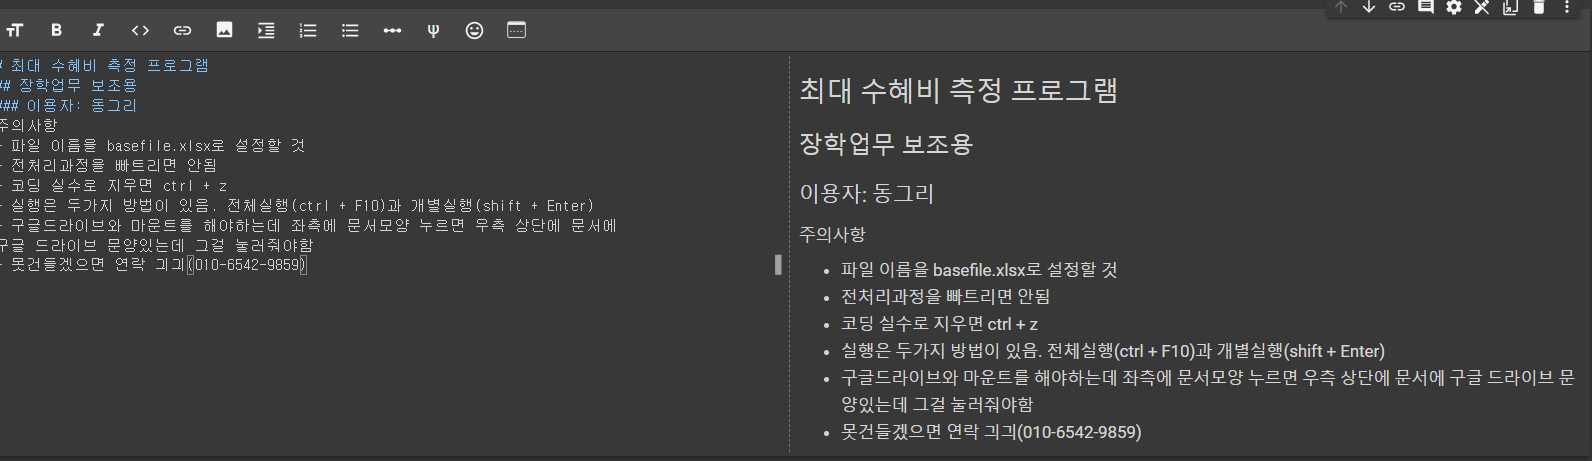



코드다 보니 접근이 어려울 수 있다면 제가 파일을 같이 볼 수 있으니 연락에 미안함 없이 연락하세요. 코드는 만든 놈이 고쳐야 되요

In [ ]:
#구글 드라이브에 마운트시켜서 드라이브 내부의 파일에 접근하기 위해서 하는 겁니다.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

## 전처리

In [ ]:
# path는 저장경로이고 filename은 파일의 현재위치 + 파일이름
# 추가적으로 파일위치는 좌측 파일모양누르고 폴더에 마우스 가져가서 좌클릭하면 위치복사 있습니다.
path = '/content/drive/MyDrive/장학금계산기/'
filename = '/content/drive/MyDrive/장학금계산기/220608 (기초자료) 2022-1학기 국가장학금 2유형 선발.xlsx'
# filename = '/content/drive/MyDrive/220608 (기초자료) 2022-1학기 국가장학금 2유형 선발.xlsx'
df = pd.read_excel(filename,engine='openpyxl',sheet_name='기초자료')
df.head(1)

In [ ]:
df.columns

In [ ]:
df_target = df[['상품명', '성명', '학과', '학번', '등록금', '국가장학금','교내장학금','소득분위','학적상태','직전학기백분위점수']]

In [ ]:
df_target.head(5)

In [ ]:
df_target.dtypes

In [ ]:
df_target['소득분위'].replace({'10구간':10,'9구간':9,'8구간':8,'7구간':7,'6구간':6,'5구간':5,
                           '4구간':4,'3구간':3,'2구간':2,'1구간':1,'기초생활수급자':0,'차상위계층':0},inplace=True)

In [ ]:
df_target['소득분위'].unique()

In [ ]:
df_target.dtypes

In [ ]:
df_target.head(3)

## 함수

In [ ]:
# 아래에 적힌대로 입력해주세요
# input1, 등록금
# input2, 국가장학금
# input3, 교내장학금
# income, 소득분위
# state, 학적상태
# score, 직전학기백분위점수
def janghak1(input1,input2,input3,income,state,score):
    income = int(income)
    #수혜가능금액
    out_max = input1-input2-input3
    # 수혜가능금액 10만원 이하 제외 
    if out_max <= 100000:
        return 0
    else:
        #신입학
        if state == "입학예정":
            #소득분위 4이하
            if income <= 4:
                return out_max
            else:
                return 1000000
        # 재학 및 복학
        else:
            if income <= 4 and score >= 70:
                return out_max
            elif income >= 5 and score >= 80:
                return 1000000
            else:
                return 0

In [ ]:
test = janghak1(3016000,2600000,0,1,'입학예정',0)
test

In [ ]:
test = janghak1(3016000,1950000,1508000,4,'입학예정',0)
test

In [ ]:
test = janghak1(2460000,1750000,0,8,'입학예정',0)
test

In [ ]:
df_target['최대수해액'] = 0 
df_target.head()

In [ ]:
for i in range(len(df_target)):
    df_target['최대수해액'][i] = janghak1(df_target.iloc[i,4],df_target.iloc[i,5],df_target.iloc[i,6],df_target.iloc[i,7],df_target.iloc[i,8],df_target.iloc[i,9])


In [ ]:
df_target['최대수해액'][0]

In [ ]:
df_target

In [ ]:
df_target.to_excel(path+'test.xlsx',index=False)